In [10]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import scipy as sp
import scipy.stats as stats
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Read json to dataframe:


In [11]:
json = '../resource/allDocstrings.json'
data = pd.read_json(json)
df = pd.DataFrame(data)


#We are only interessted in number of lines, container type and implementation type
distribution_df = pd.DataFrame(df, columns=['docstringContainerType', 'numberOfLines', 'docstringContainerImplementationType'] )



Function for removing outliers:


In [12]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


<h3>Length Distribution of Docstrings</h3>


In [14]:
#df["numberOfLines"].plot()

#plt.plot(range(0, len(df["numberOfLines"])), df["numberOfLines"].sort_values(ascending=False))
#plt.xlabel("Number of Lines")
#plt.ylabel("Amount of Docstrings")
#plt.savefig("length_distribution.png")



<h4>distribution of docstring length of first 95%</h4>


,numberOfLines,startLine
count,144016.000000,144016.000000
mean,2.769908,382.351378
std,3.136909,660.537189
min,1.000000,1.000000
25%,1.000000,56.000000
50%,1.000000,157.000000
75%,3.000000,408.000000
max,16.000000,15849.000000


85091

151740

56.076841966521684

Text(0.5, 0, 'Number of Lines')

Text(0, 0.5, 'Amount of Docstrings')

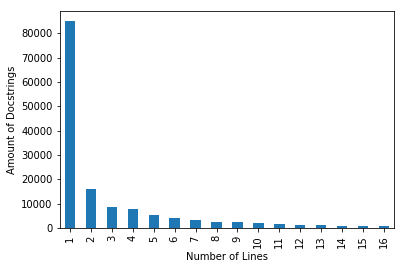

In [15]:
first_95_percent = df.loc[(df.numberOfLines <= df["numberOfLines"].quantile(0.95)) & (df.numberOfLines > 0)]
first_95_percent.describe()
pd.value_counts(first_95_percent["numberOfLines"]).plot.bar()
one_liner_count = len(df.loc[df.numberOfLines == 1].index)
one_liner_count
docstrings_count = len(df.index)
docstrings_count

percentage_of_oneliner = one_liner_count/docstrings_count * 100
percentage_of_oneliner

plt.xlabel("Number of Lines")
plt.ylabel("Amount of Docstrings")
plt.savefig("length_distribution.png")


<h4>Distribution according to Docstring Container</h4>


In [16]:

#Create dataframes for every group according to docstring container

functions = df[df.docstringContainerType == 'FUNCTION']

classes = df[df.docstringContainerType == 'CLASS']

modules = df[df.docstringContainerType == 'MODULE']

#Get element count for every group

functions_count = len(functions.index)

classes_count = len(classes.index)

modules_count = len(modules.index)

functions_count
classes_count
modules_count

#Get percentage of elements of every group

functions_percentage = functions_count/docstrings_count * 100
classes_percentage = classes_count/docstrings_count * 100
modules_percentage = modules_count/docstrings_count * 100

functions_percentage
classes_percentage
modules_percentage


118635

18357

14748

78.18307631474892

12.097667062079873

9.719256623171214

<h4>Length Distribution according to Docstring Container</h4>


Text(0.5, 0, 'Number of Lines')

Text(0, 0.5, 'Amount of Docstrings')

,numberOfLines,startLine
count,43394.000000,43394.000000
mean,6.167028,580.627852
std,4.306482,866.311990
min,2.000000,2.000000
25%,3.000000,120.000000
50%,5.000000,281.000000
75%,8.000000,671.000000
max,20.000000,15849.000000


,numberOfLines,startLine
count,5802.000000,5802.000000
mean,5.804550,370.995519
std,4.700262,551.373224
min,2.000000,2.000000
25%,2.000000,44.000000
50%,4.000000,151.000000
75%,7.000000,453.000000
max,22.000000,5847.000000


,numberOfLines,startLine
count,5450.000000,5450.000000
mean,6.985688,3.872110
std,5.822809,5.535747
min,2.000000,1.000000
25%,3.000000,1.000000
50%,4.000000,2.000000
75%,9.000000,3.000000
max,27.000000,59.000000


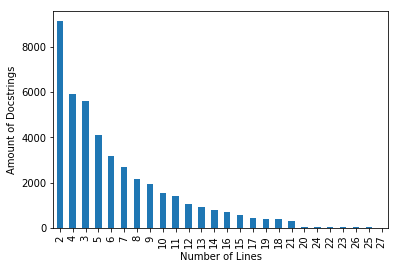

In [17]:

#Remove one-liner docstrings

functions = functions[functions.numberOfLines > 1]
classes = classes[classes.numberOfLines > 1]
modules = modules[modules.numberOfLines > 1]

#remove Tests:

functions_without_tests = functions[functions.docstringContainerImplementationType != "TEST"]
classes_without_tests = classes[classes.docstringContainerImplementationType != "TEST"]
modules_without_tests = modules[modules.docstringContainerImplementationType != "TEST"]


#First remove the outliners:

functions_without_outliers = remove_outlier(functions_without_tests, "numberOfLines")
classes_without_outliers = remove_outlier(classes_without_tests, "numberOfLines")
modules_without_outliers = remove_outlier(modules_without_tests, "numberOfLines")


#Plot length distribution without one-liners and outliers:

pd.value_counts(functions_without_outliers["numberOfLines"]).plot.bar()

plt.xlabel("Number of Lines")
plt.ylabel("Amount of Docstrings")
plt.savefig("functions_length_distribution.png")


pd.value_counts(classes_without_outliers["numberOfLines"]).plot.bar()
pd.value_counts(modules_without_outliers["numberOfLines"]).plot.bar()


#Describe all groups, get q1, and q3:

functions_without_outliers.describe()
classes_without_outliers.describe()
modules_without_outliers.describe()


In [18]:
df = df[df.numberOfLines > 1]
df_without_tests = df[df.docstringContainerImplementationType != "TEST"]
clean_df = remove_outlier(df_without_tests, "numberOfLines")
clean_df.describe()

,numberOfLines,startLine
count,54296.000000,54296.000000
mean,6.101370,503.517497
std,4.334958,813.776176
min,2.000000,1.000000
25%,3.000000,73.000000
50%,5.000000,224.000000
75%,8.000000,582.000000
max,20.000000,15849.000000
